In [130]:
import numpy as np
import matplotlib.pyplot as plt


In [131]:
dataset = np.loadtxt('housing.csv')#default delimiter whitespace
print(dataset)

[[  6.32000000e-03   1.80000000e+01   2.31000000e+00 ...,   3.96900000e+02
    4.98000000e+00   2.40000000e+01]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00 ...,   3.96900000e+02
    9.14000000e+00   2.16000000e+01]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00 ...,   3.92830000e+02
    4.03000000e+00   3.47000000e+01]
 ..., 
 [  6.07600000e-02   0.00000000e+00   1.19300000e+01 ...,   3.96900000e+02
    5.64000000e+00   2.39000000e+01]
 [  1.09590000e-01   0.00000000e+00   1.19300000e+01 ...,   3.93450000e+02
    6.48000000e+00   2.20000000e+01]
 [  4.74100000e-02   0.00000000e+00   1.19300000e+01 ...,   3.96900000e+02
    7.88000000e+00   1.19000000e+01]]


In [159]:
x = dataset[:, 1:]
#[rows,columns(1st one skipped as it has column names)]
x.shape

(506, 13)

In [163]:
r=0.8*(x.shape[0])
r=int(r)
train_data = x[:r]#number of rows data split into 80,20 %
test_data = x[r:] 


In [164]:
train_data = (train_data - np.mean(train_data, axis=0)) / np.std(train_data, axis=0)
#axis zero represents along columuns
#standardization of data helps gradient descent get to convergence faster


In [165]:
y = dataset[:404, -1]
y_soln=dataset[404:, -1]

In [166]:

train_data = np.insert(train_data, 0, 1, axis=1) #it represents constant term in the equation of h ie weight of x0


In [167]:
y = np.reshape(y, (y.shape[0], 1))
#y.shape[0] is number of rows in y

In [168]:
alpha = 0.01 # Learning rate
iterations = 1000 # Number of iterations to train over
theta = np.ones((train_data.shape[1], 1)) # Initial weights set to 1 as theta is weight matrix

m = y.shape[0] # Number of training examples 

cost_history = np.zeros(iterations) # Initialize cost history values

In [169]:
h = np.dot(train_data, theta)


In [170]:
for i in range(iterations): 
    h = np.dot(train_data, theta)
    residuals = h - y
    squared_error = np.dot(residuals.T, residuals)
    cost = 1.0/(2*m) * squared_error 

    gradient = 1.0/m * np.dot(residuals.T, train_data).T # Calculate derivative()
    theta -= (alpha * gradient) # Update weights

    cost_history[i] = cost # Store the cost for this iteration



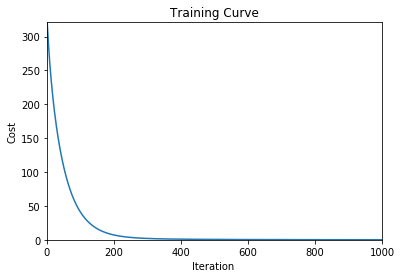

In [184]:
plt.plot(range(1, len(cost_history)+1), cost_history)

plt.xlim(1, len(cost_history))
plt.ylim(0, max(cost_history))
plt.title("Training Curve")
plt.xlabel("Iteration ")
plt.ylabel("Cost")
plt.show()

In [172]:


test_data = np.insert(test_data, 0, 1, axis=1)
#for the constant thing,should have split data after adding row of 1s
y_soln = np.reshape(y_soln, (y_soln.shape[0], 1))

In [173]:
theta.shape

(14, 1)

In [183]:
h = np.dot(test_data, theta)
residuals = h - y_soln
squared_error = np.dot(residuals.T, residuals)#mean_square_error
rmse=np.sqrt(squared_error/y_soln.shape[0])
rmse

array([[ 79.74698482]])